<a href="https://colab.research.google.com/github/pragathi1116/Meterological-data/blob/main/Temperature_and_drought_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data has been imported to the google colab using git hub. The temperature and estiagem analysis is calculated for the over time (1902 to 2023). The total number of days, and it's occurance above or below thethreshold is also calculted.

In [ ]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
url_1 = "https://github.com/FlorestaR/dados/blob/main/X_PIRACLIM/"
xls_2 = "DadosClima_Piracicaba.xlsx"
prm_3 = "?raw=true"
gitFile = url_1 + xls_2 + prm_3
print (gitFile)
rawFile = requests.get(gitFile).content
abaData = "ClimaPira"
df = pd.read_excel(rawFile, sheet_name=abaData, header=0)
df.info()

https://github.com/FlorestaR/dados/blob/main/X_PIRACLIM/DadosClima_Piracicaba.xlsx?raw=true
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43952 entries, 0 to 43951
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ANO            43952 non-null  int64  
 1   MES            43952 non-null  int64  
 2   DIA            43952 non-null  int64  
 3   TMED           38063 non-null  float64
 4   URMED          28482 non-null  float64
 5   VentoMED       27117 non-null  object 
 6   TMAX           38065 non-null  float64
 7   TMAX_hora      8499 non-null   float64
 8   URMAX          8499 non-null   float64
 9   URMAX_hora     8499 non-null   float64
 10  VentoMAX       17139 non-null  float64
 11  VentoMAX_hora  8458 non-null   float64
 12  TMIN           38067 non-null  float64
 13  TMIN_hora      8499 non-null   float64
 14  URMIN          8499 non-null   float64
 15  URMIN_hora     8499 non-null   float64
 16  Ch

By using 'TMED', 'TMAX', and 'TMIN' values the daily average temperature is calculated. mean(axis=1), points out that the average of ('TMED', 'TMAX', and 'TMIN') is calculated for each row(axis=1) in the dataframe.

In [ ]:
df['DailyAvgTemp'] = df[['TMED', 'TMAX', 'TMIN']].mean(axis=1)
df


,ANO,MES,DIA,TMED,URMED,VentoMED,TMAX,TMAX_hora,URMAX,URMAX_hora,VentoMAX,VentoMAX_hora,TMIN,TMIN_hora,URMIN,URMIN_hora,Chuva,Rad.Glob.,Estiagem,DailyAvgTemp
0,1902,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
1,1902,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
2,1902,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
3,1902,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
4,1902,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43947,2023,4,23,20.57,73.754170,1.119,28.11,1401.0,98.8,708.0,6.911,2115.0,13.19,641.0,40.46,1525.0,0.000,19.910,6,20.623333
43948,2023,4,24,20.99,70.162083,1.307,28.30,1410.0,97.7,718.0,6.831,2025.0,14.58,657.0,37.14,1500.0,0.000,19.550,6,21.290000
43949,2023,4,25,21.17,73.011563,0.559,28.59,1611.0,98.1,653.0,4.594,46.0,14.00,641.0,42.92,1522.0,0.000,18.280,6,21.253333
43950,2023,4,26,20.08,91.096250,0.404,23.68,1644.0,98.4,2115.0,4.115,1007.0,18.03,551.0,77.62,14.0,4.572,5.629,0,20.596667


The seperate columns of'ANO', 'MÊS', 'DIA'is combined into a single column, and the invalid data which is errors will be represented as 'NaT'(Not a time)

In [ ]:
df['Date'] = pd.to_datetime(df[['ANO', 'MES', 'DIA']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d', errors='coerce')

To analyze data by time 'Date' column has been set as index, when inplace=True parameter is used changes are applied directly to the original DataFrame, without creating a new copy. if it's not used then original dataframe will remain unchanged, and new copy will be created

In [ ]:
df.set_index('Date', inplace=True)
df

,ANO,MES,DIA,TMED,URMED,VentoMED,TMAX,TMAX_hora,URMAX,URMAX_hora,VentoMAX,VentoMAX_hora,TMIN,TMIN_hora,URMIN,URMIN_hora,Chuva,Rad.Glob.,Estiagem,DailyAvgTemp
Date,,,,,,,,,,,,,,,,,,,,
1902-06-01,1902,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
1902-06-02,1902,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
1902-06-03,1902,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
1902-06-04,1902,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
1902-06-05,1902,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-23,2023,4,23,20.57,73.754170,1.119,28.11,1401.0,98.8,708.0,6.911,2115.0,13.19,641.0,40.46,1525.0,0.000,19.910,6,20.623333
2023-04-24,2023,4,24,20.99,70.162083,1.307,28.30,1410.0,97.7,718.0,6.831,2025.0,14.58,657.0,37.14,1500.0,0.000,19.550,6,21.290000
2023-04-25,2023,4,25,21.17,73.011563,0.559,28.59,1611.0,98.1,653.0,4.594,46.0,14.00,641.0,42.92,1522.0,0.000,18.280,6,21.253333


The resample() method is used to group the daily temperature data by month and then calculate the mean temperature for each month. 'M' stands for monthly frequency

In [ ]:
monthly_avg_temp = df['DailyAvgTemp'].resample('M').mean()
display(monthly_avg_temp)

Date
1902-06-30          NaN
1902-07-31          NaN
1902-08-31          NaN
1902-09-30          NaN
1902-10-31          NaN
                ...    
2022-12-31    23.980538
2023-01-31    24.041828
2023-02-28    24.651786
2023-03-31    24.912366
2023-04-30    22.019753
Freq: M, Name: DailyAvgTemp, Length: 1451, dtype: float64

The resample() method is used to group the daily temperature data by year and then calculate the mean temperature for each year. 'Y' stands for yearly frequency

In [ ]:
yearly_avg_temp = df['DailyAvgTemp'].resample('Y').mean()
display(yearly_avg_temp)

Date
1902-12-31          NaN
1903-12-31          NaN
1904-12-31          NaN
1905-12-31          NaN
1906-12-31          NaN
                ...    
2019-12-31    22.963744
2020-12-31    22.500182
2021-12-31    22.265973
2022-12-31    22.045862
2023-12-31    23.951823
Freq: A-DEC, Name: DailyAvgTemp, Length: 122, dtype: float64

"comparison of the monthly and yearly average temperature trends over time"                       The x-axis represents the time period in years and months, and the y-axis represents the temperature. 'plt.plot' method is used to plot the monthly and yearly average temperature values.label' parameter is used to specify the name.

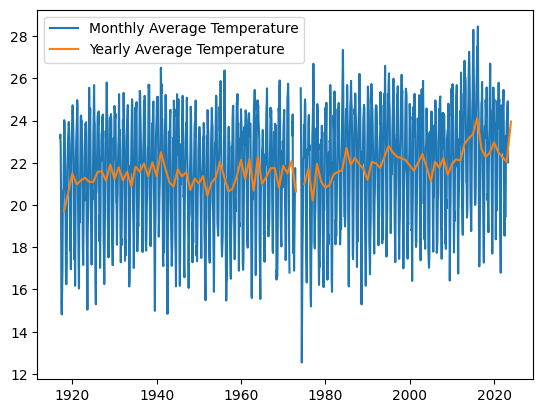

In [ ]:
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, label='Monthly Average Temperature')
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, label='Yearly Average Temperature')
plt.legend()
plt.show()

First, the threshold temperature (celsius) is set for heatwaves and coldspell. Then new dataframe is created where DailyAvgTemp is greater than the heatwave threshold for heatwaves, and DailyAvgTemp is less than the coldspell threshold for coldspell. len() is the length of the object(sum of the heatwaves or coldspell in the entire dataframe)

In [ ]:
heatwave_threshold = 31
coldspell_threshold = 8

heatwaves = df[df['DailyAvgTemp'] > heatwave_threshold]
coldspells = df[df['DailyAvgTemp'] < coldspell_threshold]

print('Number of heatwaves:', len(heatwaves))
if len(heatwaves) > 0:
    print('First heatwave date:', heatwaves.index.min())
    print('Last heatwave date:', heatwaves.index.max())

print('Number of coldspells:', len(coldspells))
if len(coldspells) > 0:
    print('First coldspell date:', coldspells.index.min())
    print('Last coldspell date:', coldspells.index.max())

Number of heatwaves: 2
First heatwave date: 2020-10-02 00:00:00
Last heatwave date: 2020-10-06 00:00:00
Number of coldspells: 13
First coldspell date: 1918-06-24 00:00:00
Last coldspell date: 1981-07-21 00:00:00


The number of drought days, and drought spell is counted from 1902 to 2023. First condition, is used to check if the value is equal to zero which means no rain. Then, cumulative sum is used to calculate consecutive period of days without rain which is the drought spell. 

In [ ]:
drought_days = df['Estiagem'].eq(0).cumsum()
drought_spell = drought_days.groupby(drought_days).transform('count')
drought_spell = drought_spell.where(df['Estiagem'].eq(0))
print('Number of drought days:', drought_days)
print('Drought spell:' , drought_spell)

Number of drought days: Date
1902-06-01        0
1902-06-02        0
1902-06-03        0
1902-06-04        0
1902-06-05        0
              ...  
2023-04-23    13385
2023-04-24    13385
2023-04-25    13385
2023-04-26    13386
2023-04-27    13387
Name: Estiagem, Length: 43952, dtype: int64
Drought spell: Date
1902-06-01    NaN
1902-06-02    NaN
1902-06-03    NaN
1902-06-04    NaN
1902-06-05    NaN
             ... 
2023-04-23    NaN
2023-04-24    NaN
2023-04-25    NaN
2023-04-26    1.0
2023-04-27    1.0
Name: Estiagem, Length: 43952, dtype: float64


To plot the graph,  plotly.graph_objs is imported, and the code is recalled. The 0 values in the Estiagem column is replaced with the length of the previous drought spell (number of consecutive days without rain), or 0 if there was no previous drought spell. Example: If Estiagem column has values [0, 0, 0, 1, 1, 0, 1], then the drought spell would be [0, 0, 0, 0, 0, 2, 0]

In [ ]:
from typing import ValuesView
import pandas as pd
import plotly.graph_objs as go
url_1 = "https://github.com/FlorestaR/dados/blob/main/X_PIRACLIM/"
xls_2 = "DadosClima_Piracicaba.xlsx"
prm_3 = "?raw=true"
gitFile = url_1 + xls_2 + prm_3
print (gitFile)
rawFile = requests.get(gitFile).content
abaData = "ClimaPira"
df = pd.read_excel(rawFile, sheet_name=abaData, header=0)
df['DailyAvgTemp'] = df[['TMED', 'TMAX', 'TMIN']].mean(axis=1)
df['Date'] = pd.to_datetime(df[['ANO', 'MES', 'DIA']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d', errors='coerce')
df.set_index('Date', inplace=True)
monthly_avg_temp = df['DailyAvgTemp'].resample('M').mean()
heatwave_threshold = 31
coldspell_threshold = 10
drought_spell = df['Estiagem'].replace(0, np.nan).fillna(method='ffill').fillna(0)
display(drought_spell)

https://github.com/FlorestaR/dados/blob/main/X_PIRACLIM/DadosClima_Piracicaba.xlsx?raw=true


Date
1902-06-01    5.0
1902-06-02    5.0
1902-06-03    5.0
1902-06-04    5.0
1902-06-05    5.0
             ... 
2023-04-23    6.0
2023-04-24    6.0
2023-04-25    6.0
2023-04-26    6.0
2023-04-27    6.0
Name: Estiagem, Length: 43952, dtype: float64

The monthly and daily average temperature, drought spell length, heatwave and coldspell threshold is used to plot the graph over time.

In [ ]:
trace1 = go.Scatter(x=monthly_avg_temp.index, y=monthly_avg_temp.values, name='Monthly Average Temperature')
trace2 = go.Scatter(x=df.index, y=df['DailyAvgTemp'], name='Daily Average Temperature')
trace3 = go.Scatter(x=df.index, y=drought_spell, name='Drought Spell Length')
trace4 = go.Scatter(x=[df.index.min(), df.index.max()], y=[heatwave_threshold, heatwave_threshold], mode='lines', name='Heatwave Threshold', line=dict(color='red', dash='dash'))
trace5 = go.Scatter(x=[df.index.min(), df.index.max()], y=[coldspell_threshold, coldspell_threshold], mode='lines', name='Coldspell Threshold', line=dict(color='blue', dash='dash'))

iplot() function is used to display the plot

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
trace1 = go.Scatter(x=monthly_avg_temp.index, y=monthly_avg_temp.values, name='Monthly Average Temperature')
trace2 = go.Scatter(x=df.index, y=df['DailyAvgTemp'], name='Daily Average Temperature')
trace3 = go.Scatter(x=df.index, y=drought_spell, name='Drought Spell Length')
trace4 = go.Scatter(x=[df.index.min(), df.index.max()], y=[heatwave_threshold, heatwave_threshold], mode='lines', name='Heatwave Threshold', line=dict(color='red', dash='dash'))
trace5 = go.Scatter(x=[df.index.min(), df.index.max()], y=[coldspell_threshold, coldspell_threshold], mode='lines', name='Coldspell Threshold', line=dict(color='blue', dash='dash'))
data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(title='Climatic Data',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Temperature (°C)'))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Drought spell is the consecutive days without rain. First condition, is used to check if the value is equal to zero which means no rain. cumulative sum is used to calculate consecutive period of days without rain. By using the length of each drought spell graph is plotted.

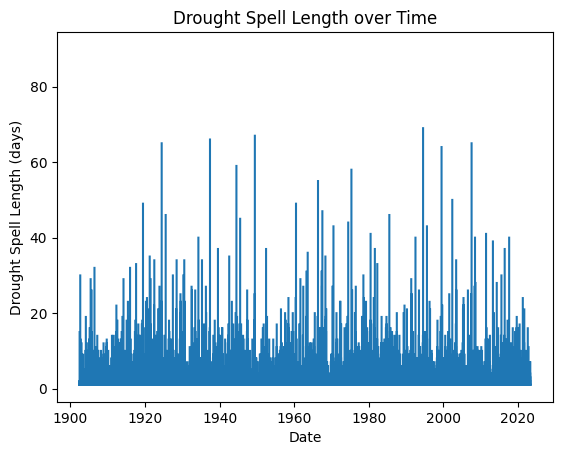

In [ ]:
import matplotlib.pyplot as plt

drought_days = df['Estiagem'].eq(0).cumsum()
drought_spell = drought_days.groupby(drought_days).transform('count')
drought_spell = drought_spell.where(df['Estiagem'].eq(0))

plt.plot(df.index, drought_spell)
plt.title('Drought Spell Length over Time')
plt.xlabel('Date')
plt.ylabel('Drought Spell Length (days)')
plt.show()